# Data Format

Sample dataset of one year hourly basis machine monitor, with the recorded info about failures.
Link: https://bigml.com/user/czuriaga/gallery/dataset/587d062d49c4a16936000810

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
data = pd.read_csv('./data/BigML_Dataset_66a94517facfe55d4a01747d.csv')

In [59]:
## Data
data

,Date,Temperature,Humidity,Operator,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,...,Measure15,Hours Since Previous Failure,Failure,﻿Date.year,﻿Date.month,﻿Date.day-of-month,﻿Date.day-of-week,﻿Date.hour,﻿Date.minute,﻿Date.second
0,2016-01-01 00:00:00,67,82,Operator1,291,1,1,1041,846,334,...,1842,90,No,2016,1,1,5,0,0,0
1,2016-01-01 01:00:00,68,77,Operator1,1180,1,1,1915,1194,637,...,748,91,No,2016,1,1,5,1,0,0
2,2016-01-01 02:00:00,64,76,Operator1,1406,1,1,511,1577,1121,...,1689,92,No,2016,1,1,5,2,0,0
3,2016-01-01 03:00:00,63,80,Operator1,550,1,1,1754,1834,1413,...,711,93,No,2016,1,1,5,3,0,0
4,2016-01-01 04:00:00,65,81,Operator1,1928,1,2,1326,1082,233,...,507,94,No,2016,1,1,5,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2016-12-31 19:00:00,66,79,Operator8,937,0,2,1875,1719,219,...,410,7,No,2016,12,31,6,19,0,0
8780,2016-12-31 20:00:00,60,77,Operator8,379,3,0,814,1990,1606,...,943,8,No,2016,12,31,6,20,0,0
8781,2016-12-31 21:00:00,61,77,Operator8,595,3,1,1659,1134,1314,...,200,9,No,2016,12,31,6,21,0,0
8782,2016-12-31 22:00:00,72,81,Operator8,1038,3,2,254,1400,564,...,1192,10,No,2016,12,31,6,22,0,0


For wgrp, we only need the times between interventions or failures, so we will filter the dataset by the `Failure` column

In [60]:
data = data[data['Failure'] == 'Yes']

data_failure = pd.DataFrame()
data_failure['date'] = data['Date']
data_failure['event_type'] = 'Corretive' # there is no intervention but failure, therefore the type is corrective
data_failure

,date,event_type
148,2016-01-07 04:00:00,Corretive
515,2016-01-22 11:00:00,Corretive
516,2016-01-22 12:00:00,Corretive
517,2016-01-22 13:00:00,Corretive
667,2016-01-28 19:00:00,Corretive
...,...,...
8181,2016-12-06 21:00:00,Corretive
8182,2016-12-06 22:00:00,Corretive
8593,2016-12-24 01:00:00,Corretive
8771,2016-12-31 11:00:00,Corretive


In [61]:
# Import WGRP model
from mwgrp.model import *

from sklearn.model_selection import train_test_split

In [62]:
# separating 20% ​​of the date for future series behavior comparison testing
train, test=  train_test_split(data_failure, test_size=0.2, shuffle=False)

In [63]:
# starting a wgrp template
wgrp = wgrp_model()

In [64]:
# adjusting model
wgrp.fit(train)

In [65]:
# Predict future events
predict  = wgrp.predict(len(test))

alpha = 0.04202164210569658
beta = 0.19895205045501507
q = 8.382686108938097e-05


In [66]:
# formalism
wgrp.df_

,Formalism,AIC,AICc,BIC,alpha,beta,q,y_prev,y_corr
0,RP,169.81,170.01,174.09,1.23,0.37,0.0,None,None
1,NHPP,326.43,326.63,330.72,8.58,1.16,1.0,None,None
2,Kijima I,153.23,153.63,159.66,0.04,0.20,0.0,1,1
3,Kijima II,165.13,165.53,171.55,0.68,0.31,0.0,0,0
4,Intervention type-based,169.13,170.18,179.84,0.52,0.31,0.0,0.001352,0.786902


alpha = 0.04202164210569658
beta = 0.19895205045501507
q = 8.382686108938097e-05

In [67]:
params = wgrp.parameters
params['nSamples'] = 10

In [68]:
# Creating 10 random series

boot = bootstrap_sample(params)['sample_matrix']

In [69]:
serie_real = append_times_between_events_from_date_events(data_failure, time_unit='days')

In [70]:
serie_real = accumulate_values(serie_real['TBE'])

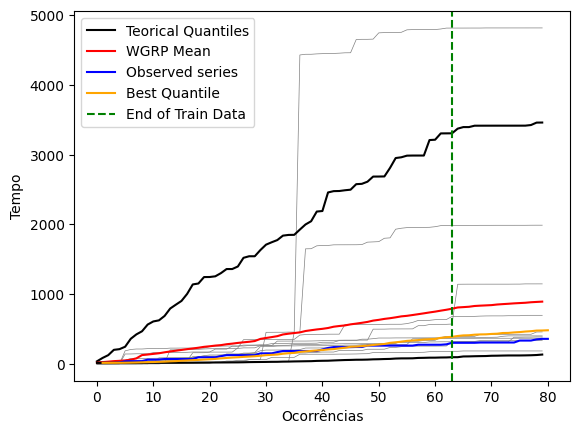

In [71]:
fig, ax = plt.subplots()
for i in range(boot.shape[0]):
    ax.plot(accumulate_values(boot[i, :]), label=None, color='gray', linewidth=0.5)
ax.plot(wgrp.quantile_s, label='Teorical Quantiles', color='black')
ax.plot(predict['Mean'], label='WGRP Mean', color='red')

ax.plot(predict['Intervention'],serie_real, label='Observed series', color='blue')
ax.plot(wgrp.quantile_i, label=None, color='black')
ax.plot(predict['Intervention'],wgrp.quantile_n, label='Best Quantile', color='orange')
ax.axvline(x=len(train['date'])-1, color='green', linestyle='--', label='End of Train Data')
ax.legend()
ax.set_xlabel('Ocorrências')
ax.set_ylabel('Tempo')
plt.show()

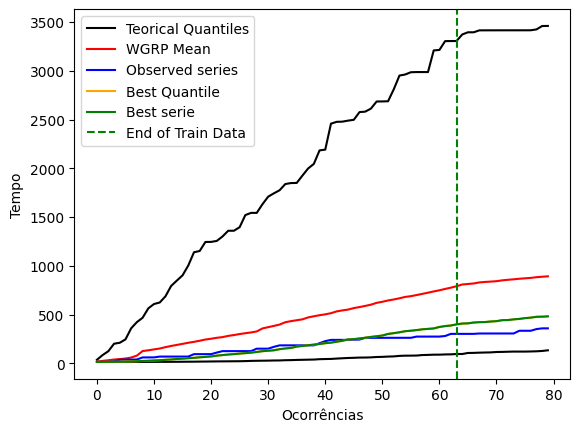

In [72]:
fig, ax = plt.subplots()
# for i in range(boot.shape[0]):
#     ax.plot(accumulate_values(boot[i, :]), label=None, color='gray', linewidth=0.5)
ax.plot(wgrp.quantile_s, label='Teorical Quantiles', color='black')
ax.plot(predict['Mean'], label='WGRP Mean', color='red')

ax.plot(serie_real, label='Observed series', color='blue')
ax.plot(wgrp.quantile_i, label=None, color='black')
ax.plot(wgrp.quantile_n, label='Best Quantile', color='orange')
ax.plot(wgrp.best_prediction, label='Best serie', color='green')
ax.axvline(x=len(train['date'])-1, color='green', linestyle='--', label='End of Train Data')
ax.legend()
ax.set_xlabel('Ocorrências')
ax.set_ylabel('Tempo')
plt.show()

# Numeric Format

An assembly line uses hydraulic pumps in its production process, in addition to other types of equipment. After an FMEA analysis of the plant, it was concluded that the “pump failure” failure mode was one of the most critical in terms of occurrence and effect, and had the potential to bring the entire operation to a halt. Link: https://www.ctscompass.com/category/weibull/

In [30]:
data_numeric = [76,90,98,103,105,114,121,124,136,140,140,145,150,150, 158, 164,168,176,178,200,202,205,212,230,245,246]


# separating 20% ​​of the date for future series behavior comparison testing
train2, test2=  train_test_split(data_numeric, test_size=0.2, shuffle=False)

In [31]:
data_numeric_ac = accumulate_values(data_numeric)

In [32]:
wgrp2 = wgrp_model()

In [33]:
wgrp2.fit(data=train2, type='numeric')

In [34]:
predict2 = wgrp2.predict(len(test2))

alpha = 149.35589334589918
beta = 4.863444068709363
q = 0


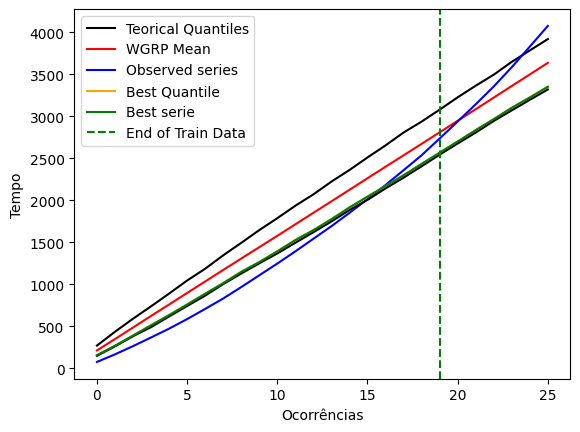

In [36]:
fig, ax = plt.subplots()
# for i in range(boot.shape[0]):
#     ax.plot(accumulate_values(boot[i, :]), label=None, color='gray')
ax.plot(wgrp2.quantile_s, label='Teorical Quantiles', color='black')
ax.plot(predict2['Mean'], label='WGRP Mean', color='red')

ax.plot(data_numeric_ac, label='Observed series', color='blue')

ax.plot(wgrp2.quantile_n, label='Best Quantile', color='orange')
ax.plot(wgrp2.quantile_i, label=None, color='black')
ax.plot(wgrp2.best_prediction, label='Best serie', color='green')
ax.axvline(x=len(train2)-1, color='green', linestyle='--', label='End of Train Data')
ax.legend()
ax.set_xlabel('Ocorrências')
ax.set_ylabel('Tempo')
plt.show()

## Parametric RDA data

An analyst recorded the successive failures of the air-condition unit of an aircraft. The objective is to obtain the expected number of failures that may occur by 1,800 hours. The following data sheet shows the failure logs of the unit between 0 to 1,539 hours of observation. The observation period ended at the time of the last failure.
link: https://help.reliasoft.com/weibull22/content/parametric_rda_example.htm

In [37]:
data_weibull = [50,94,196,268,290,329,332,347,544,732,811,899,945,950,955,991,1013,1152,1362,1459,1489,1512,1525,1539]

In [38]:
wgrp3 = wgrp_model()

In [39]:
serie_acumulada = [data_weibull[i + 1] - data_weibull[i] for i in range(len(data_weibull) - 1)]
real_serie_acumulate = accumulate_values(serie_acumulada)

In [40]:
wgrp3.fit(data_weibull, type='numeric', accumulated=True)

In [42]:
pred = wgrp3.predict(qtd=5, events_in_the_future_tense=261, best_prediction=True)
wgrp3.events_in_the_future_tense

alpha = 89.7043341461038
beta = 1.116096008134304
q = 1


27

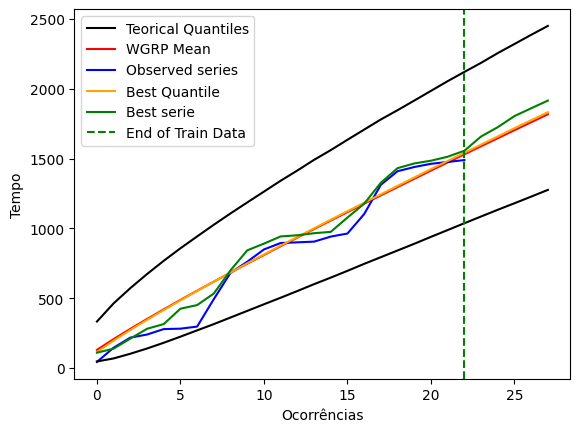

In [43]:
fig, ax = plt.subplots()

ax.plot(wgrp3.quantile_s, label='Teorical Quantiles', color='black')
ax.plot(pred['Mean'], label='WGRP Mean', color='red')

ax.plot(real_serie_acumulate, label='Observed series', color='blue')
ax.plot(wgrp3.quantile_i, label=None, color='black')
ax.plot(wgrp3.quantile_n, label='Best Quantile', color='orange')
ax.plot(wgrp3.best_prediction, label='Best serie', color='green')
ax.axvline(x=len(real_serie_acumulate)-1, color='green', linestyle='--', label='End of Train Data')
ax.legend()
ax.set_xlabel('Ocorrências')
ax.set_ylabel('Tempo')
plt.show()

In [44]:
# data data
data_weibull2 = pd.read_csv('./data/data_weibullplusplus.csv')


In [45]:
data_weibull2

,Intervenção,Inicio,date,event_type
0,Falha,2022-06-03 05:00:00,2022-06-03 05:00:00,Corretive
1,Falha,2022-06-05 01:00:00,2022-06-05 01:00:00,Corretive
2,falha,2022-06-09 07:00:00,2022-06-09 07:00:00,Corretive
3,falha,2022-06-12 07:00:00,2022-06-12 07:00:00,Corretive
4,falha,2022-06-13 05:00:00,2022-06-13 05:00:00,Corretive
5,falha,2022-06-14 20:00:00,2022-06-14 20:00:00,Corretive
6,falha,2022-06-14 23:00:00,2022-06-14 23:00:00,Corretive
7,falha,2022-06-15 14:00:00,2022-06-15 14:00:00,Corretive
8,falha,2022-06-23 19:00:00,2022-06-23 19:00:00,Corretive
9,falha,2022-07-01 15:00:00,2022-07-01 15:00:00,Corretive


In [46]:
wgrp4 = wgrp_model()

In [47]:
data_train, data_test = train_test_split(data_weibull2, test_size=0.2, shuffle=False)

In [48]:
tam = len(data_test['date'])

In [49]:
wgrp4.fit(data_train, time_unit='hours')

In [50]:
real_serie = append_times_between_events_from_date_events(data_weibull2, time_unit='hours')
real_serie_acumulate2 = accumulate_values(real_serie['TBE'])

In [51]:
pred2 = wgrp4.predict(qtd=tam, events_in_the_future_tense=261, best_prediction=True)
wgrp4.events_in_the_future_tense

alpha = 72.95026570593203
beta = 1.0020604788033962
q = 0


22

In [52]:
params = wgrp4.parameters

In [53]:
params['nSamples'] = 10

In [54]:
boot = bootstrap_sample(params)['sample_matrix']

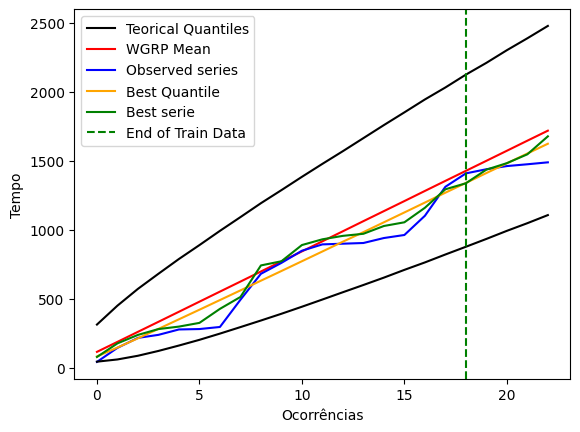

In [55]:
fig, ax = plt.subplots()
# for i in range(boot.shape[0]):
#     ax.plot(accumulate_values(boot[i, :]), label=None, color='gray')
ax.plot(wgrp4.quantile_s, label='Teorical Quantiles', color='black')
ax.plot(pred2['Mean'], label='WGRP Mean', color='red')

ax.plot(real_serie_acumulate2, label='Observed series', color='blue')
ax.plot(wgrp4.quantile_i, label=None, color='black')
ax.plot(wgrp4.quantile_n, label='Best Quantile', color='orange')
ax.plot(wgrp4.best_prediction, label='Best serie', color='green')
ax.axvline(x=len(data_train['date'])-1, color='green', linestyle='--', label='End of Train Data')
ax.legend()
ax.set_xlabel('Ocorrências')
ax.set_ylabel('Tempo')
plt.show()

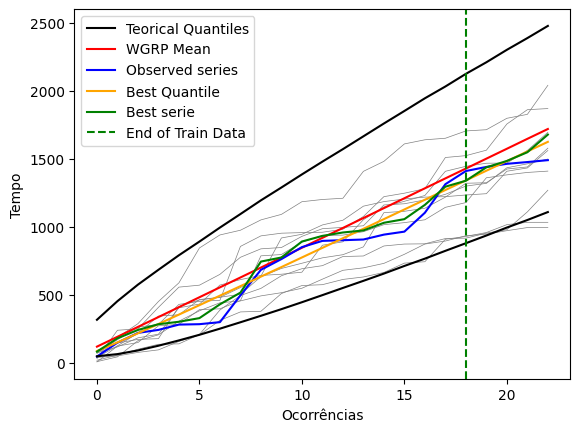

In [56]:
fig, ax = plt.subplots()
for i in range(boot.shape[0]):
    ax.plot(accumulate_values(boot[i, :]), label=None, color='gray', linewidth=0.5)
ax.plot(wgrp4.quantile_s, label='Teorical Quantiles', color='black')
ax.plot(pred2['Mean'], label='WGRP Mean', color='red')

ax.plot(real_serie_acumulate2, label='Observed series', color='blue')
ax.plot(wgrp4.quantile_i, label=None, color='black')
ax.plot(wgrp4.quantile_n, label='Best Quantile', color='orange')
ax.plot(wgrp4.best_prediction, label='Best serie', color='green')
ax.axvline(x=len(data_train['date'])-1, color='green', linestyle='--', label='End of Train Data')
ax.legend()
ax.set_xlabel('Ocorrências')
ax.set_ylabel('Tempo')
plt.show()